In [8]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import os


def compute_projections(volume):
    """
    Args:
        volume (np.ndarray): 3D volume (D, H, W)
    Returns:
        avg_proj (np.ndarray): average intensity projection (H, W)
        max_proj (np.ndarray): maximum intensity projection (H, W)
    """
    avg_proj = np.mean(volume, axis=1)
    max_proj = np.max(volume, axis=1)
    return avg_proj, max_proj

def plot_projections(volumes_dict, save_dir=None):
    """
    Args:
        volumes_dict (dict): {'name': volume, ...}
        save_dir (str): if provided, saves plots there
    """
    n = len(volumes_dict)
    fig, axs = plt.subplots(n, 2, figsize=(8, 4 * n))

    if n == 1:
        axs = np.expand_dims(axs, axis=0)  # Handle case of single volume

    for i, (name, volume) in enumerate(volumes_dict.items()):
        avg_proj, max_proj = compute_projections(volume)

        # Normalize for visualization (0-1)
        avg_proj = (avg_proj - avg_proj.min()) / (avg_proj.max() - avg_proj.min() + 1e-8)
        max_proj = (max_proj - max_proj.min()) / (max_proj.max() - max_proj.min() + 1e-8)

        axs[i, 0].imshow(avg_proj, cmap='gray')
        axs[i, 0].set_title(f"{name} - Average Intensity")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(max_proj, cmap='gray')
        axs[i, 1].set_title(f"{name} - Maximum Intensity")
        axs[i, 1].axis('off')

    plt.tight_layout()

    # if save_dir:
    #     os.makedirs(save_dir, exist_ok=True)
    #     save_path = os.path.join(save_dir, "projections_comparison.png")
    #     plt.savefig(save_path, dpi=300)
    #     print(f"Saved figure to {save_path}")

    plt.show()


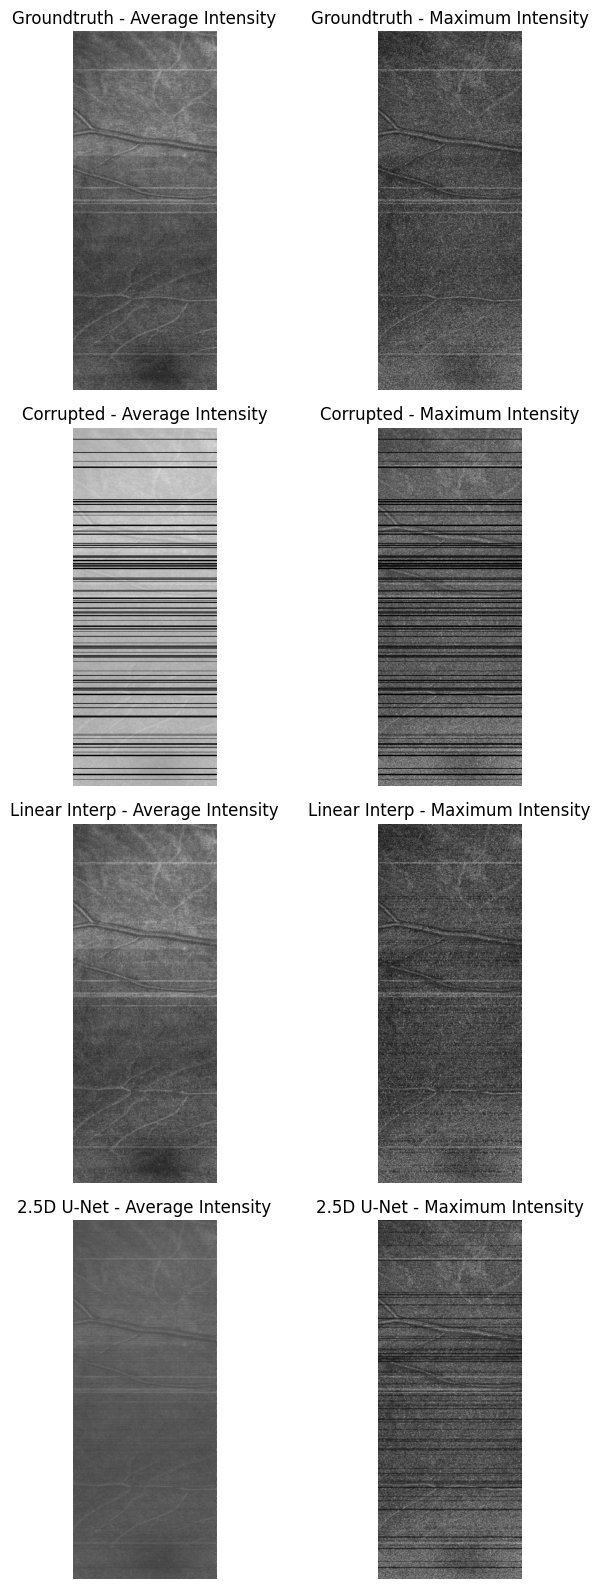

In [9]:
groundtruth_path = "/media/admin/Expansion/Mosaic_Data_for_Ipeks_Group/OCT_Inpainting_Testing/5.3_OCT_uint16_Cropped_Reflected_VolumeSplit_1_RegSeq_seqSVD_gt.tif"
corrupted_path = "/media/admin/Expansion/Mosaic_Data_for_Ipeks_Group/OCT_Inpainting_Testing/5.3_OCT_uint16_Cropped_Reflected_VolumeSplit_1_RegSeq_seqSVD_corrupted.tif"
linear_interp_path = "/media/admin/Expansion/Mosaic_Data_for_Ipeks_Group/OCT_Inpainting_Testing/5.3_OCT_uint16_Cropped_Reflected_VolumeSplit_1_RegSeq_seqSVD_corrupted_LinearInterp.tif"
model_output_path = "/media/admin/Expansion/Mosaic_Data_for_Ipeks_Group/OCT_Inpainting_Testing/5.3_OCT_uint16_Cropped_Reflected_VolumeSplit_1_RegSeq_seqSVD_inpainted_2p5DUNet_v3_brightcorr.tif"

volumes = {
    "Groundtruth": tiff.imread(groundtruth_path),
    "Corrupted": tiff.imread(corrupted_path),
    "Linear Interp": tiff.imread(linear_interp_path),
    "2.5D U-Net": tiff.imread(model_output_path),
}

plot_projections(volumes)
